In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
import pandas as pd

In [3]:
od.download("https://www.kaggle.com/datasets/karthickveerakumar/salary-data-simple-linear-regression")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: assaabriiii
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/karthickveerakumar/salary-data-simple-linear-regression


100%|██████████| 378/378 [00:00<00:00, 471kB/s]

In [4]:
df = pd.read_csv("salary-data-simple-linear-regression/Salary_Data.csv")

In [18]:
c = 0.01
m = 0.01 # y_pred = m⋅x + c
L = 0.01 # learning rate

In [31]:
for i in range(10):
  y_pred = m * df['YearsExperience'] + c

  D_m = (-2/len(df)) * sum(df['YearsExperience'] * (df['Salary'] - y_pred))
  D_c = (-2/len(df)) * sum(df['Salary'] - y_pred)

  m = m - L * D_m
  c = c - L * D_c

  if i % 100 == 0:
      print(f"Iteration {i}: m={m:.2f}, c={c:.2f}")
      print(f"Error {i}: {1/len(df) * sum(df['Salary'] - y_pred)}")

print(f"Final m: {m}, Final c: {c}")


Iteration 0: m=9449.96, c=25792.20
Error 0: 8.949427865445614e-11
Final m: 9449.962321455143, Final c: 25792.20019866825


In [32]:
print(f"{df['Salary'][1]}")
print(f"{df['YearsExperience'][1] * m + c}")
len(df)

46205.0
38077.15121655994


30

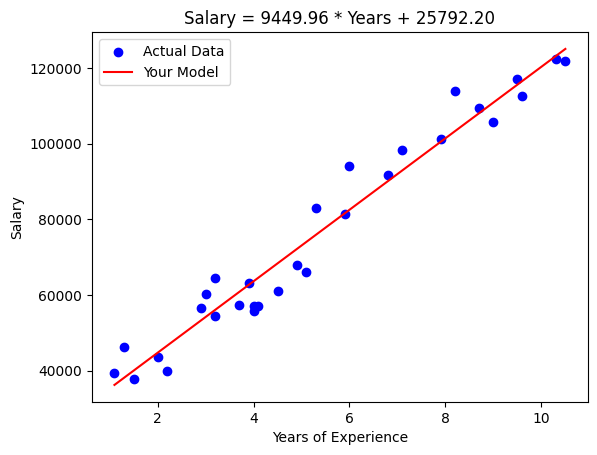

In [35]:
import matplotlib.pyplot as plt

# 1. Plot the actual data points (Blue Dots)
plt.scatter(df['YearsExperience'], df['Salary'], color='blue', label='Actual Data')

# 2. Plot your "From Scratch" Line (Red Line)
# We generate the line using your calculated m and c
plt.plot(df['YearsExperience'], m * df['YearsExperience'] + c, color='red', label='Your Model')

plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title(f'Salary = {m:.2f} * Years + {c:.2f}')
plt.legend()
plt.show()